# ネットワーク指標の統計解析
### ランダム化ネットワークを使って，大腸菌のタンパク質相互作用ネットワークを例にして次のネットワーク指標の統計的有意性の評価を行います。 + 平均クラスタ係数 + 平均最短経路長

In [10]:
import numpy as np
import pandas as pd
import networkx as nx

import matplotlib.pyplot as plt

## 大腸菌のタンパク質相互作用ネットワークの読み込み

In [5]:
d = pd.read_csv("../data/ecoli_ppi_Hu_etal_2009.txt", header=None,names=["source", "target"], sep="\t| ", engine='python')
g = nx.from_pandas_edgelist(d)
Gcc = sorted(nx.connected_components(g), key=len, reverse=True)
G = g.subgraph(Gcc[0])

### ランダム化ネットワークを作成するためのソースコードの読み込み

In [6]:
cc_real = nx.average_clustering(G)

### 現実のネットワークの平均最短経路長を計算する。

In [7]:
apl_real = nx.average_shortest_path_length(G)

## 100個のランダムネットワークを作成して，ネットワーク指標を計算する。
### 平均クラスタ係数と平均最短経路長 時間がかかります。

In [15]:
G = nx.Graph(G)
deg = nx.degree(G) # for configureraion model

cc_null = []
apl_null = []

for i in range(100):

    # 1) 
    # https://stackoverflow.com/questions/48321963/how-to-generate-a-random-network-but-keep-the-original-node-degree-using-network/48323124

    # NOTE: 自己ループは除くが、多重辺は残る？

    g_null = nx.expected_degree_graph([deg for (_, deg) in G.degree()], selfloops=False)

    # 2) configuration model

    cc_null.append(nx.average_clustering(g_null))
    apl_null.append(nx.average_shortest_path_length(g_null))

NetworkXError: Graph is not connected.

## Zスコアの計算

In [16]:
z_cc = (cc_real - np.mean(cc_null)) / np.std(cc_null)
z_apl = (apl_real - np.mean(apl_null)) / np.std(apl_null)

## 帰無分布と観測値（平均クラスタ係数)

(0.07751761247474727, 0.08163879170553531)

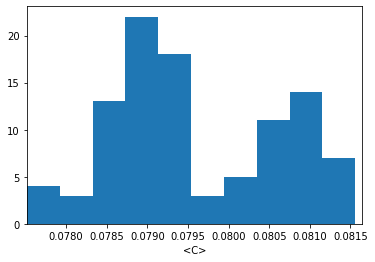

In [22]:
plt.hist(cc_null)
# plt.axvline(cc_real, "red")

plt.xlabel("<C>")
plt.xlim(min(cc_null), cc_real)


## 帰無分布と観測値（平均最短経路長）


(4.101309998083837, 4.102343153433222)

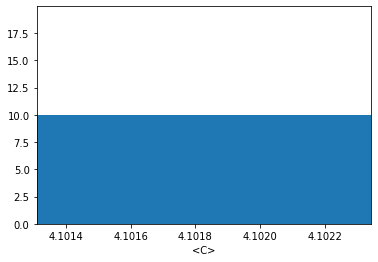

In [24]:
plt.hist(apl_null)
# plt.axvline(cc_real, "red")

plt.xlabel("<C>")
plt.xlim(min(apl_null), apl_real)